<a href="https://colab.research.google.com/github/SamuelGads/WRAPIT2021ProjectFiles/blob/main/WrapITFP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#Retireving CSV Files fromGithub Repository
path1 = 'https://raw.githubusercontent.com/SamuelGads/WRAPIT2021ProjectFiles/main/Twitch_game_data.csv'
path2 = 'https://raw.githubusercontent.com/SamuelGads/WRAPIT2021ProjectFiles/main/Twitch_global_data.csv'

In [ ]:
#Making dataframes from the data
df1 = pd.read_csv(path1)
df7 = pd.read_csv(path2)


In [ ]:
#Function to determin game placement
def top_count(gamename): 
  top_count = 0
  for x in gamename['Rank']:
    if x <= 5:
      top_count = top_count + 1
    else:
      pass
  return top_count


In [ ]:
#Removing unnessacary columns
df1.drop(columns=['Hours_Streamed','Avg_viewers','Avg_channels','Avg_viewer_ratio'], inplace=True)

#Reducing size to the top 5 each month
df2 = df1.loc[df1['Rank'] <= 5]
df2

,Rank,Game,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers
0,1,League of Legends,1,2016,94377226,530270,2903,129172
1,2,Counter-Strike: Global Offensive,1,2016,47832863,372654,2197,120849
2,3,Dota 2,1,2016,45185893,315083,1100,44074
3,4,Hearthstone,1,2016,39936159,131357,517,36170
4,5,Call of Duty: Black Ops III,1,2016,16153057,71639,3620,214054
...,...,...,...,...,...,...,...,...
13200,1,Just Chatting,7,2021,240051080,772137,6307,425721
13201,2,Grand Theft Auto V,7,2021,142539300,476100,6212,196492
13202,3,League of Legends,7,2021,134363514,511589,6029,215610
13203,4,VALORANT,7,2021,80880189,296686,6844,287260


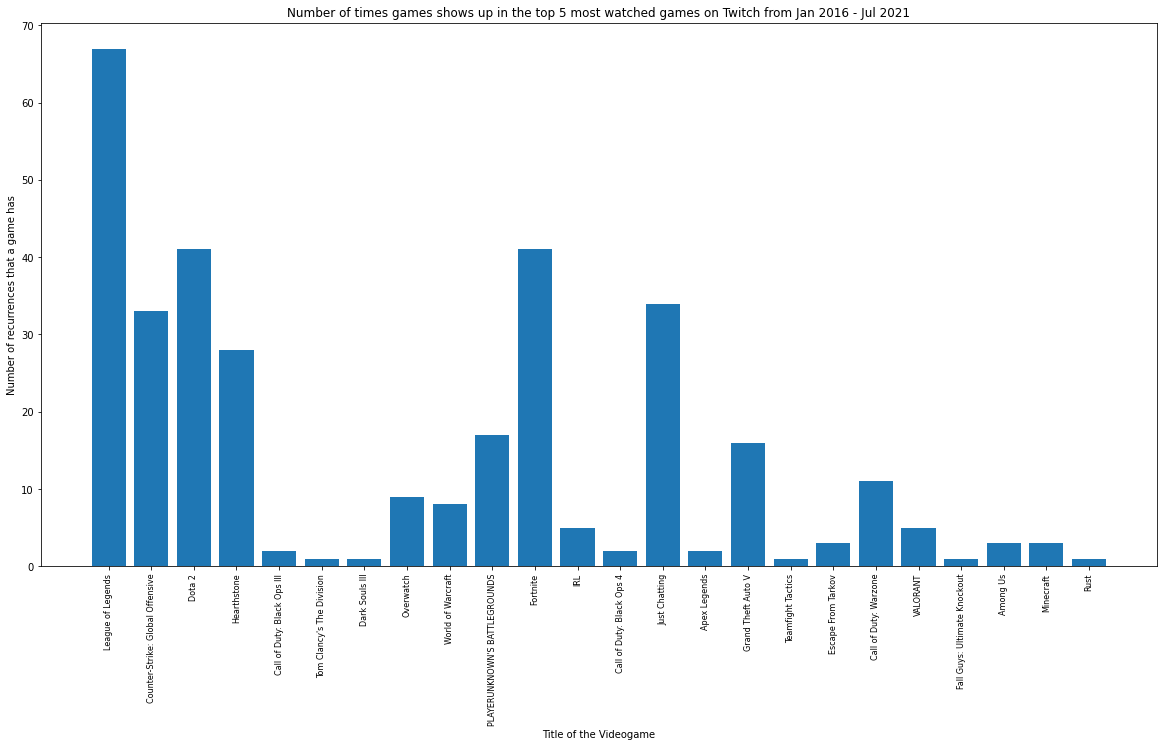

In [ ]:
#How often games show up in the top 5
#Determining count of how many times a game shows up
games = {}
for game in df2['Game']:
  if game in games.keys():
    games[game] += 1  
  else:
    games[game] = 1

#Creating Graph for number of times watched (G1)
fig1 = plt.figure(figsize=[20,10])
ax1 = fig1.add_subplot(111)


plt.ylabel('Number of recurrences that a game has')
plt.xlabel('Title of the Videogame')
ax1.set_title("Number of times games shows up in the top 5 most watched games on Twitch from Jan 2016 - Jul 2021")
ax1.bar(games.keys(),games.values())
ax1.tick_params(axis='x', rotation=90, labelsize=8)
plt.show()



In [ ]:
#Box whisker plot examining the top 3 games with most occurences
#Filtering dataframes for other top 5 games on graph 1
league = df2.loc[df2['Game'] == 'League of Legends']
dota2 = df2.loc[df2['Game'] == 'Dota 2']
fort = df2.loc[df2['Game'] == 'Fortnite']
jc = df2.loc[df2['Game'] == 'Just Chatting']
csgo = df2.loc[df2['Game'] == 'Counter-Strike: Global Offensive']
#figuring out the top 3 based
print("League tops: ", top_count(league),"\nDota 2 tops: ", top_count(dota2),"\nFortnite tops: ", top_count(fort), "\nJust Chatting tops: ", top_count(jc), "\nCounter-Strike: Global Offensive tops: ", top_count(csgo))
print('\nLeague of Legends, Dota 2, and Fortnite are the top 3 games\n')
#Setting filters for Hours watched
data = league['Hours_watched']
data2 = dota2['Hours_watched']
data3 = fort['Hours_watched']

#League Data
league_Average_hours = data.mean()
league_Median = data.median()
league_Mode = data.mode()[0]
league_small = data.min()
league_large = data.max()
print("League Average hours watched: ", round(league_Average_hours),"\nLeague Median: ", round(league_Median), "\nLeague Mode: " ,league_Mode ,"\nSmallest League Time: ", league_small ,"\nLargest League Time: ",league_large)




League tops:  67 
Dota 2 tops:  41 
Fortnite tops:  41 
Just Chatting tops:  34 
Counter-Strike: Global Offensive tops:  33

League of Legends, Dota 2, and Fortnite are the top 3 games

League Average hours watched:  101477245 
League Median:  92428052 
League Mode:  68210459 
Smallest League Time:  68210459 
Largest League Time:  174012672


In [ ]:
#Dota 2 Data
dota2_Average_hours = data2.mean()
dota2_Median = data2.median()
dota2_Mode = data2.mode()[0]
dota2_small = data2.min()
dota2_large = data2.max()
print("Dota 2 Average hours watched: " ,round(dota2_Average_hours) ,"\nDota 2 Median: ",dota2_Median ,"\nDota 2 Mode: ", dota2_Mode,"\nSmallest Dota 2 Time: ",dota2_small ,"\nLongest Dota 2 Time: ", dota2_large)


Dota 2 Average hours watched:  41325352 
Dota 2 Median:  40141922.0 
Dota 2 Mode:  24378147 
Smallest Dota 2 Time:  24378147 
Longest Dota 2 Time:  70885379


In [ ]:
#Fortnite Data
fortnite_Average_hours = data3.mean()
fortnite_Median = data3.median()
fortnite_Mode = data3.mode()[0]
fortnite_small = data3.min()
fortnite_large = data3.max()
print("Fortnite Average hours watched: " , round(fortnite_Average_hours),"\nFortnite Median: ", fortnite_Median,"\nFortnite Mode: ", fortnite_Mode,"\nSmallest Fortnite Time: ",fortnite_small ,"\nLongest Fortnite Time: ", fortnite_large)

Fortnite Average hours watched:  95893348 
Fortnite Median:  100443090.0 
Fortnite Mode:  32129147 
Smallest Fortnite Time:  32129147 
Longest Fortnite Time:  152086231


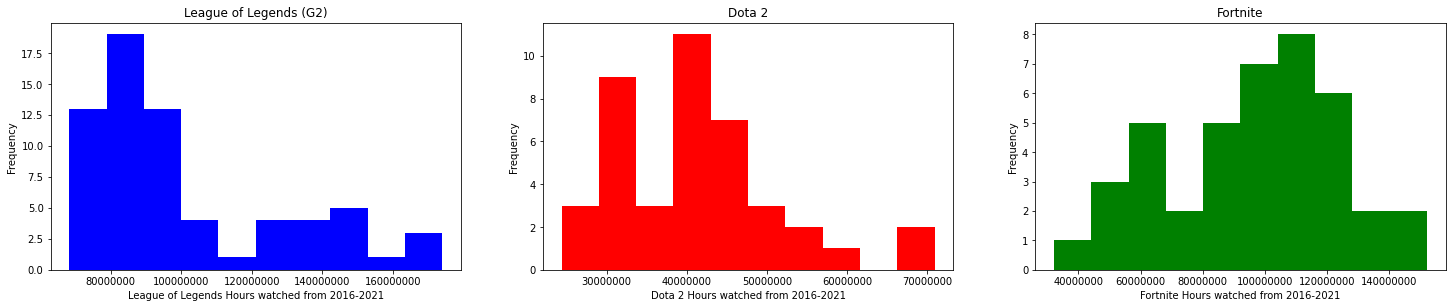

In [ ]:
#Creating a Histogram for League of Leagends, Dota 2, and Fortnite based on hours watched (G2 - G4)

#Creating and plotting (G2-G4)
fig2 = plt.figure(figsize=[25,10])
ax2 = fig2.add_subplot(231)
ax3 = fig2.add_subplot(232)
ax4 = fig2.add_subplot(233)

#League Graph
ax2.hist(data, bins=10, color='b')
ax2.set_title('League of Legends (G2)')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('League of Legends Hours watched from 2016-2021')
ax2.ticklabel_format(style='plain')

#Dota 2 Graph
ax3.hist(data2, bins=10, color='r')
ax3.set_title('Dota 2')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Dota 2 Hours watched from 2016-2021')
ax3.ticklabel_format(style='plain')

#Fortnite Graph
ax4.hist(data3, bins=10, color='g')
ax4.set_title('Fortnite')
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Fortnite Hours watched from 2016-2021')
ax4.ticklabel_format(style='plain')



plt.show()

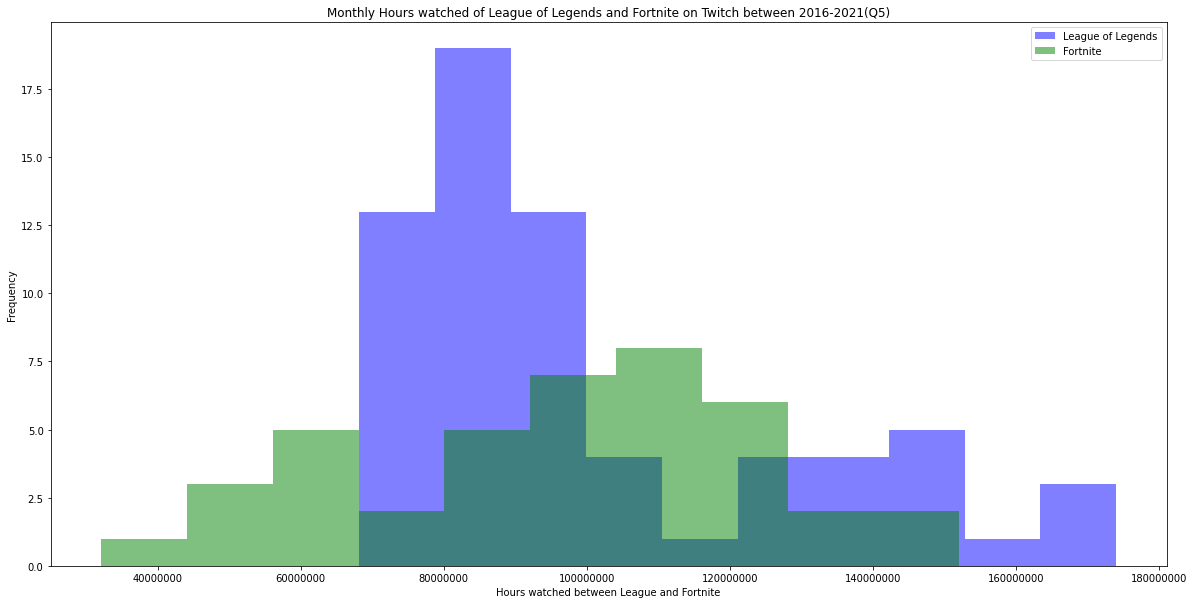

In [ ]:
#Overlayed histogram to see numerical correlations between League of Legends and Fortnite
labels = ['League of Legends','Fortnite']
fig3 = plt.figure(figsize=[20,10])
ax5 = fig3.add_subplot(111)
plt.hist(data, alpha=.5,color='b', label='League of Legends',align='mid')
plt.hist(data3, alpha=.5,color='g', label='Fortnite',align='mid')
ax5.set_title('Monthly Hours watched of League of Legends and Fortnite on Twitch between 2016-2021(Q5)')
ax5.set_xlabel('Hours watched between League and Fortnite')
ax5.set_ylabel('Frequency')
ax5.ticklabel_format(style='plain')
ax5.legend()

plt.show()

In [ ]:
#Peak Viewer datasets
data4 = league['Peak_viewers']
data5 = dota2['Peak_viewers']
data6 = fort['Peak_viewers']
#Max peak viewers
league_Peak = data4.max()
dota2_Peak = data5.max()
fort_Peak = data6.max()

print("League Peak View",league_Peak,"\nDota2 Peak View",dota2_Peak,"\nFortnite Peak View",fort_Peak)

League Peak View 2020835 
Dota2 Peak View 1045985 
Fortnite Peak View 2331987


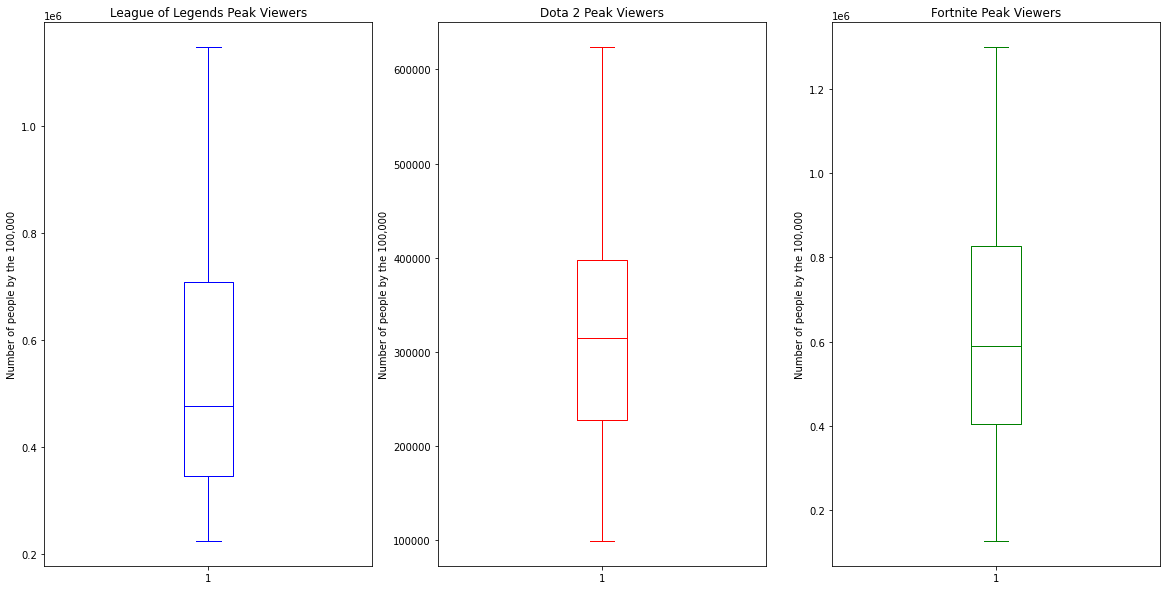

In [ ]:
#setting up a box and whisker plot comparing the top 3's Peak viewership
#Creating and plotting (G6)
fig4 = plt.figure(figsize=[20,10])
ax6 = fig4.add_subplot(131)
ax7 = fig4.add_subplot(132)
ax8 = fig4.add_subplot(133)
#League graph
ax6.boxplot(data4, sym='',boxprops=dict(color='b'),
            capprops=dict(color='b'),
            whiskerprops=dict(color='b'),
            flierprops=dict(color='b', markeredgecolor='b'),
            medianprops=dict(color='b'),)
ax6.set_title('League of Legends Peak Viewers')
ax6.set_ylabel('Number of people by the 100,000')
#Dota 2 graph
ax7.boxplot(data5, sym='',boxprops=dict(color='r'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', markeredgecolor='r'),
            medianprops=dict(color='r'),)
ax7.set_title('Dota 2 Peak Viewers')
ax7.set_ylabel('Number of people by the 100,000')
#Fortnite graph
ax8.boxplot(data6, sym='',boxprops=dict(color='g'),
            capprops=dict(color='g'),
            whiskerprops=dict(color='g'),
            flierprops=dict(color='g', markeredgecolor='g'),
            medianprops=dict(color='g'),)
ax8.set_title('Fortnite Peak Viewers')
ax8.set_ylabel('Number of people by the 100,000')



plt.show()